<a href="https://colab.research.google.com/github/vaariasa/senalesysistemas/blob/master/parcial_2se%C3%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Taller/Parcial_2: Señales y sistemas 2020-1
Valentina Arias Arias

Universidad Nacional de Colombia- sede manizales

#2. Representacion generalizada
2.3 Encuentre el espectro $cn \in \mathbb{C}$ de la señal $x(t) = u(t)$ a través
de la representación generalizada $x(t) = \sum\limits_{n=-\infty}^\infty{c_n \phi_n(t)}$
para $\phi_n(t) = e^{jn\omega_o t}$: Realice una simulacion en Python para
$t \in  [0; 2]$ y determine el error relativo para $n \in{0\pm1,\pm2}$



Text(0, 0.5, 'x(t)')

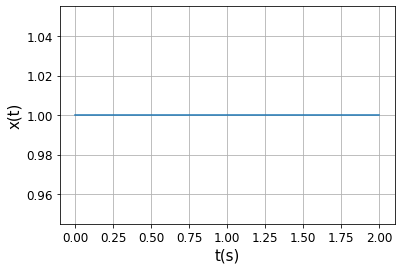

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

T = 2 
Fs = 200 
Nm = T*Fs 
tv = np.linspace(0,T,Nm)

xo = np.ones(int(Nm))

plt.plot(tv,xo)
plt.grid()
plt.xlabel("t(s)",fontsize = 15)
plt.ylabel("x(t)",fontsize = 15)

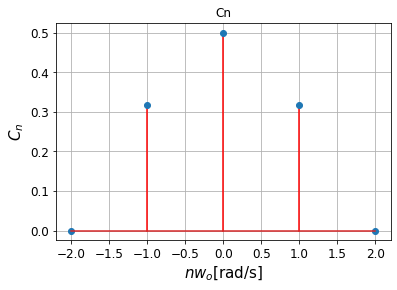

In [ ]:
N = 2 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamentas

phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)
  
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = ((1j)/(2*nv*np.pi))*((-1)**(-nv)-1)
Cn[N] = 1/2 
#graficar espectro

plt.stem(nv, abs(Cn), 'r')
plt.title(r'Cn')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 15)
plt.ylabel(r'$C_n$',fontsize = 15)
plt.axis('tight')
plt.grid()

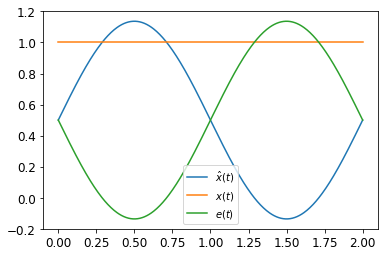

In [ ]:
xe = phin @ Cn  
plt.plot(tv,xe,label = '$\hat{x}(t)$')
plt.plot(tv,xo,label = '$x(t)$')
plt.plot(tv,xo-xe,label = '$e(t)$')
plt.legend()

#3. Serie de fourier
3.1 Implemente simulaciones de python para graficar la parte real del espectro, la parte imaginaria, la magnitud del espectro, la fase del espectro y la señal reconstruida

**a) t**

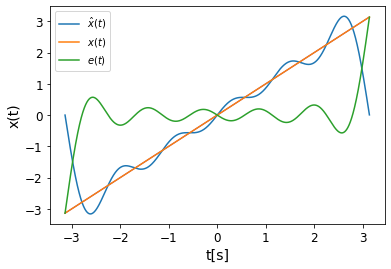

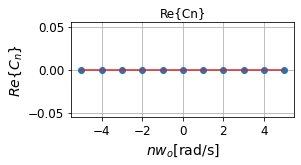

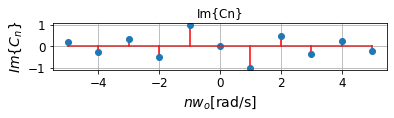

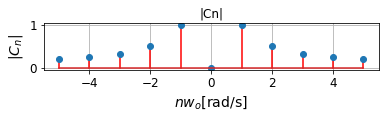

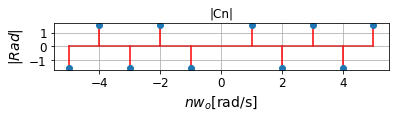

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 2*np.pi 
Fs = 400 
Nm = T*Fs 
L = 2*Nm+1
Li = int(L+1)
tv = np.arange(-T/2,T/2,T/L)
x = tv

plt.plot(tv,x,'b',linewidth=1)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)

N = 5 #numero armonicos
wo = 2*np.pi/T 
# %% definir bases
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) 
Cn = (1j)*(-1)**nv/(nv)
Cn[N] = 0
phin = np.zeros((Li,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

X = phin @ Cn  #producto matricial para calcular componentes espectrales phin.dot(Cn)
plt.plot(tv,X,label = '$\hat{x}(t)$')
plt.plot(tv,x,label = '$x(t)$')
plt.plot(tv,x-X,label = '$e(t)$')
plt.grid()
plt.legend()

fig = plt.figure(figsize=(4,8))
plt.subplot(4,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,4)
plt.stem(nv, np.arctan(-np.imag(Cn)/np.fabs(np.real(Cn))), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|Rad|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

**b) $|\sin(t)|$**

Text(0, 0.5, 'x(t)')

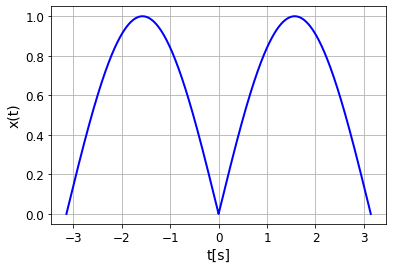

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 2*np.pi 
Fs = 500
Nm = T*Fs #numero de muestras requeridas
L = 2*Nm+1
Li = int(L+1)
tv = np.linspace(-T/2,T/2,Li)
x = abs(np.sin(tv))

plt.plot(tv,x,'b',linewidth=2)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)

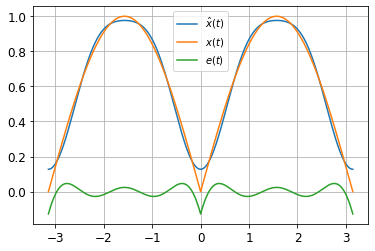

In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (1+(-1)**nv)/(np.pi*(1-nv**2))
Cn[N] = 2/np.pi
Cn[N-1] = 0
Cn[N+1] = 0
phin = np.zeros((Li,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)


X = phin @ Cn  #producto matricial para calcular componentes espectrales phin.dot(Cn)
plt.plot(tv,X,label = '$\hat{x}(t)$')
plt.plot(tv,x,label = '$x(t)$')
plt.plot(tv,x-X,label = '$e(t)$')
plt.grid()
plt.legend()

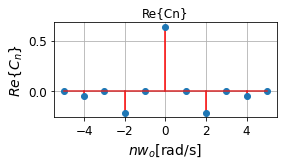

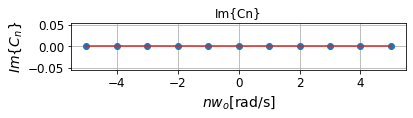

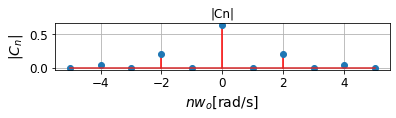

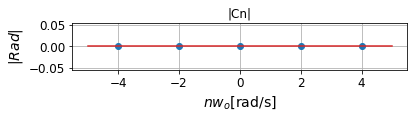

In [ ]:
fig = plt.figure(figsize=(4,8))
plt.subplot(4,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,4)
plt.stem(nv, np.arctan(-np.imag(Cn)/np.fabs(np.real(Cn))), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|Rad|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

**c) $sgn(t)$**

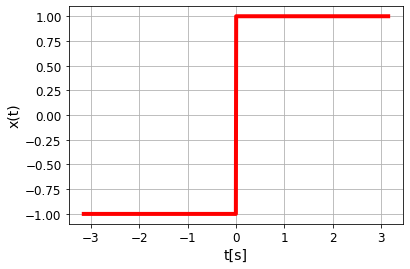

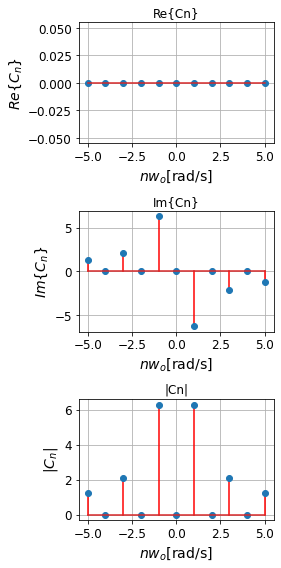

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
from ipywidgets import interact,IntSlider
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

N=5
T = 2*np.pi 
wo = 2*np.pi/T
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,int(Nm))

xo = np.sign(tv)

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) 
Cn = (1j/nv*np.pi)*(((-1)**nv) -1)
Cn[N] = 0 

#graficar espectro
fig = plt.figure(figsize=(4,8))
plt.subplot(3,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(3,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(3,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()
# %% definir bases
phin = np.zeros((int(Nm),2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)


Px = 1 # estimar según señal estudiada
suma=0
peso=0
for n in range(1,5):
  peso= ((1/(n*np.pi))*((-1)**n)-1)**2
  suma= suma+peso
er= 1-(2*suma)/Px
er
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- ( abs(Cn[N])**2 + 2*np.sum(abs(Cn[N:N+Na+1])**2))/Px
    xe = phin[:,ind]@ Cn[ind] 
    plt.plot(tv,xe,color='b',label='xe')
    plt.plot(tv,xo,color='r',label='x')
    plt.title('Er=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()



**d)$ |\cos^{2}\frac{(t)}{2}|$**

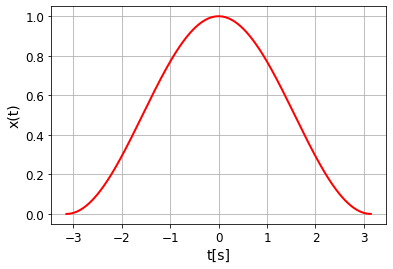

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 2*np.pi #2 segundos de grafica
Fs = 500 
Nm = T*Fs
L = 2*Nm+1
Li = int(L)
tv = np.linspace(-T/2,T/2,Li)
x = (np.cos(tv/2))**2

plt.plot(tv,x,'r',linewidth=2)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()



In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn[N] = 0.5
Cn[N+1] = 0.25
Cn[N-1] = 0.25
phin = np.zeros((Li,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)


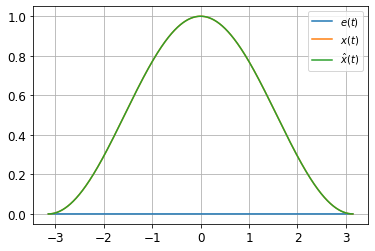

In [ ]:
X = phin @ cn  #producto matricial para calcular componentes espectrales phin.dot(Cn)
plt.plot(tv,X,label = '$e(t)$')
plt.plot(tv,x,label = '$x(t)$')
plt.plot(tv,x-X,label = '$\hat{x}(t)$')
plt.grid()
plt.legend()

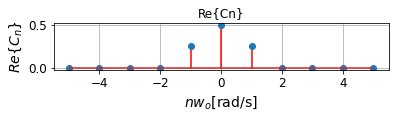

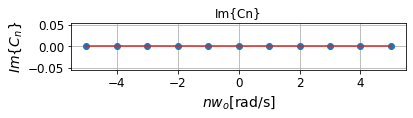

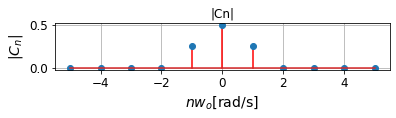

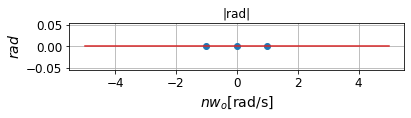

In [ ]:
plt.subplot(4,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,4)
plt.stem(nv, np.arctan(-np.imag(Cn)/np.fabs(np.real(Cn))), 'r')
plt.title(r'|rad|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$rad$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()



**e) $e^{j\frac{(t)}{2}}$**

Text(0, 0.5, 'x(t)')

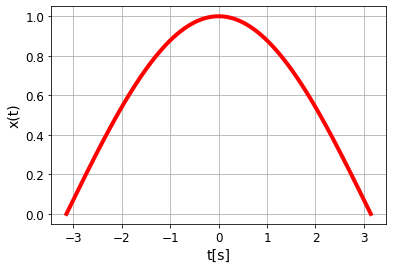

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 2*np.pi #2 segundos de grafica
Fs = 500 # 1000 muestras por segundo Ajustar según señal estudiada
Nm = T*Fs #numero de muestras requeridas
L = 2*Nm+1
Li = int(L)
tv = np.linspace(-T/2,T/2,Li)
x = (np.exp(1j*tv/2))

plt.plot(tv,x,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)

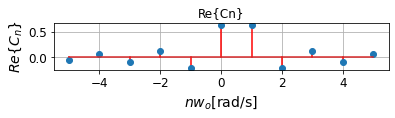

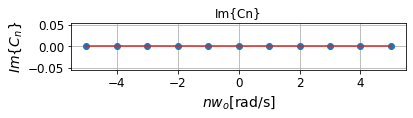

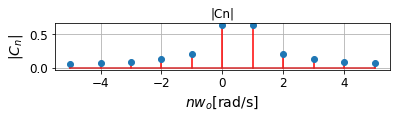

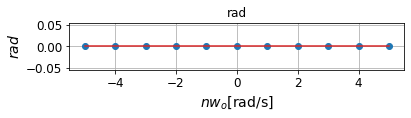

In [ ]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (2*np.cos(np.pi*nv)**nv)/((1-2*nv)*np.pi)
Cn[N] = 2/np.pi
phin = np.zeros((Li,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)


X = phin @ Cn  #producto matricial para calcular componentes espectrales phin.dot(Cn)
plt.plot(tv,X,label = '$\hat{x}(t)$')
plt.plot(tv,x,label = '$x(t)$')
plt.plot(tv,x-X,label = '$e(t)$')
plt.grid()
plt.legend()

plt.subplot(4,1,1)
plt.stem(nv, np.real(Cn), 'r')
plt.title(r'Re{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.title(r'Im{Cn}')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,3)
plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.subplot(4,1,4)
plt.stem(nv, np.arctan(-np.imag(Cn)/np.fabs(np.real(Cn))), 'r')
plt.title(r'rad')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$rad$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

**f) $t^{2}$**

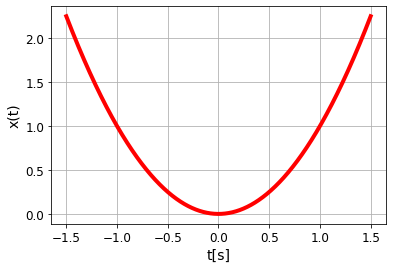

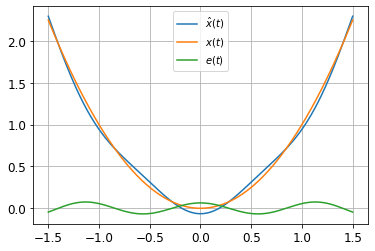

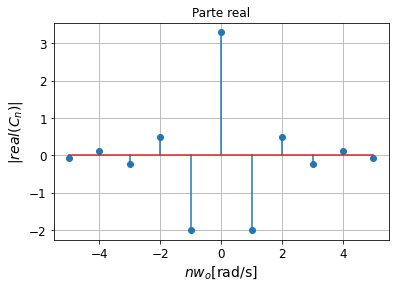

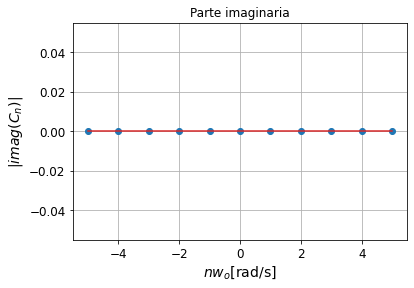

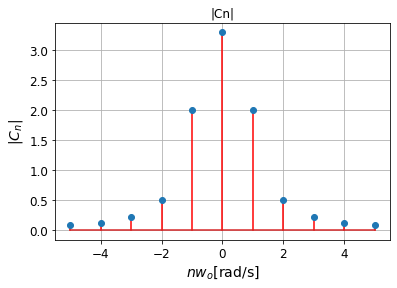

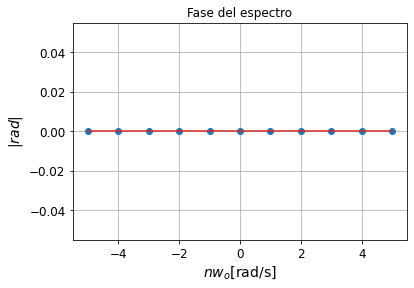

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 3 #3 segundos de grafica
Fs = 500 # 500 muestras por segundo
Nm = T*Fs #numero de muestras requeridas
tv = np.linspace(-T/2,T/2,Nm)

xo  = tv**2

plt.plot(tv,xo,'r',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

xe = phin @ Cn  #producto matricial para calcular componentes espectrales phin.dot(Cn)
plt.plot(tv,xe,label = '$\hat{x}(t)$')
plt.plot(tv,xo,label = '$x(t)$')
plt.plot(tv,xo-xe,label = '$e(t)$')
plt.grid()
plt.legend()
plt.show()

N = 5 #numero armonicos
wo = 1 # frecuencia fundamentas
# %% definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = (2*(-1)**nv)/(nv**2)
Cn[N] = np.pi**2/3

plt.stem(nv,np.real(Cn))
plt.title(r'Parte real')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|real(C_n)|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.stem(nv,np.imag(Cn))
plt.title(r'Parte imaginaria')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|imag(C_n)|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

plt.stem(nv, abs(Cn), 'r')
plt.title(r'|Cn|')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()

fe = np.arctan(np.imag(Cn)/np.real(Cn))
plt.stem(nv,fe)
plt.title(r'Fase del espectro')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|rad|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()


3.3 Compruebe el espectro obtenido
con la estimacion a partir de  $x(t)$ mediante una simulacion en Python.

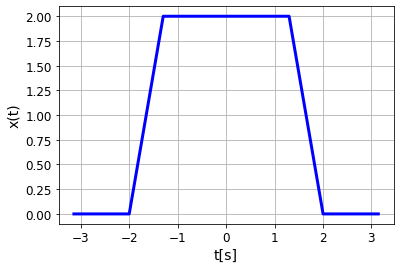

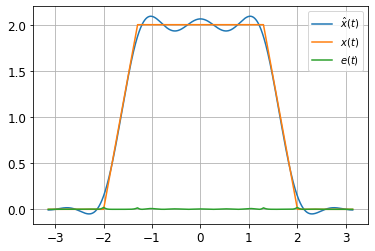

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 2*np.pi 
Fs = 500 
Nm = T*Fs 
L = 2*Nm
d2=2
d1=1.3
A=2
m=A/(d2-d1)
b=m*d2
L1=L*(T/2-d2)/(T)
L2=L*(d2-d1)/(T)+1
L3=L*(2*d1)/(T)+1
tv1 = np.linspace(-T/2,-d2,int(L1))
tv2 = np.linspace(-d2,-d1,int(L2))
tv3 = np.linspace(-d1,d1,int(L3))
tv4 = np.linspace(d1,d2,int(L2))
tv5 = np.linspace(d2,T/2,int(L1))
x1 = np.zeros(int(L1))
x2 = m*tv2+b
x3 = A*np.ones(int(L3))
x4 = -m*tv4+b
x5 = np.zeros(int(L1))
tv=np.concatenate((tv1,tv2,tv3,tv4,tv5),axis=0)
x=np.concatenate((x1,x2,x3,x4,x5),axis=0)

plt.plot(tv,x,'b',linewidth=3)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# %% definir bases
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = m*(np.cos(nv*d1*wo)-np.cos(nv*d2*wo))/(np.pi*nv**2*wo**2)
Cn[N] = A*(d1+d2)/T
phin = np.zeros((int(L),2*N+1),dtype=np.complex_)
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

X = phin @ Cn  #producto matricial para calcular componentes espectrales phin.dot(Cn)
plt.plot(tv,X,label = '$\hat{x}(t)$')
plt.plot(tv,x,label = '$x(t)$')
plt.plot(tv,(x-X)**2,label = '$e(t)$')
plt.grid()
plt.legend()

#4. Transformada de fourier
4.1 Compruebe los resultados
obtenidos en el punto 1 utilizando la FFT en Python.

**a)$t$**

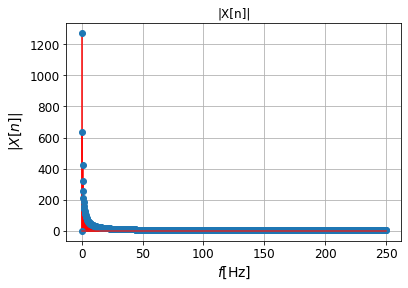

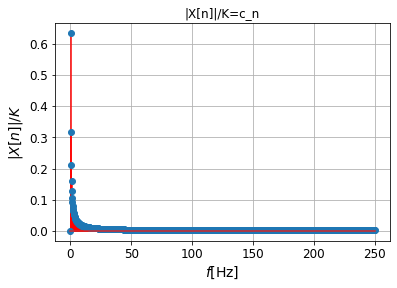

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 4 
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,Nm)
xo = tv
vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.grid()
plt.show()

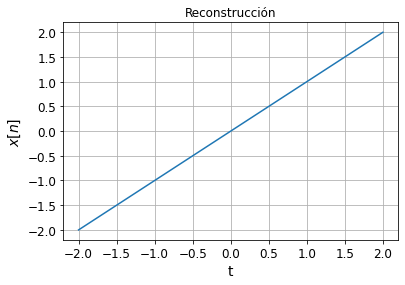

In [ ]:
#la reconstrucción de x[k] 
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title('Reconstrucción')
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x[n]$',fontsize = 14)
plt.grid()
plt.show()


**b) $|\sin(t)|$**

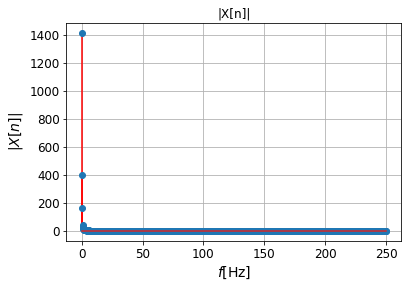

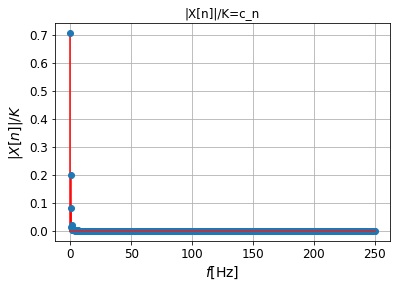

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 4 
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,Nm)
xo = np.abs(np.sin(tv))
vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.grid()
plt.show()

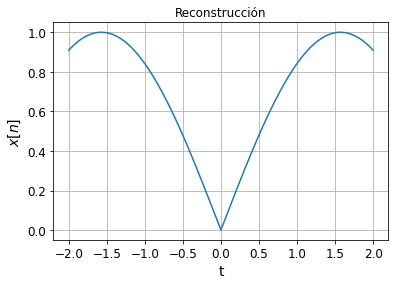

In [ ]:
#la reconstrucción de x[k] 
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title('Reconstrucción')
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x[n]$',fontsize = 14)
plt.grid()
plt.show()

**c) $sgn(t)$**

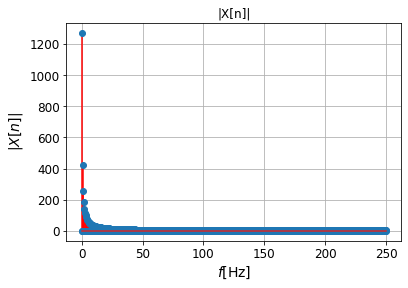

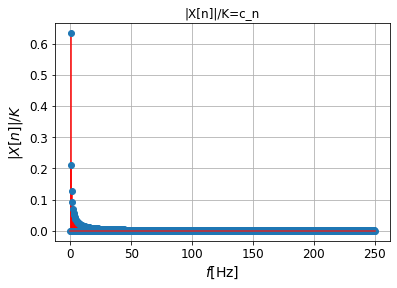

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 4 
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,Nm)
xo = np.sign(tv)
vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.grid()
plt.show()

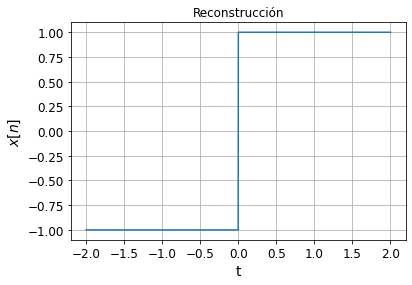

In [ ]:
#la reconstrucción de x[k] 
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title('Reconstrucción')
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x[n]$',fontsize = 14)
plt.grid()
plt.show()

**d)$ |\cos^{2}\frac{(t)}{2}|$**

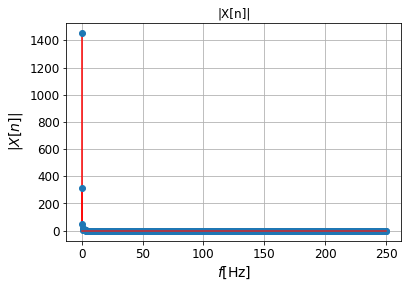

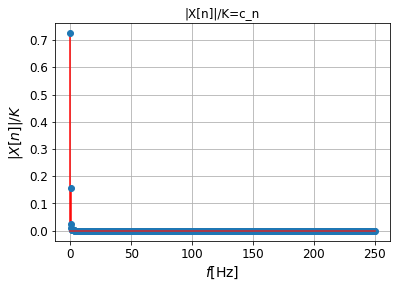

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 4 
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,Nm)
xo = np.abs(np.cos(tv/2)**2)
vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.grid()
plt.show()

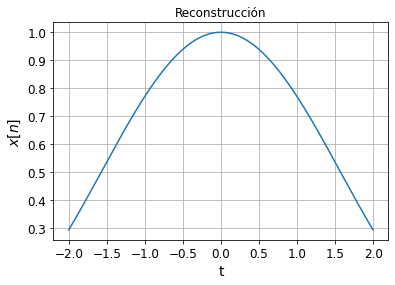

In [ ]:
#la reconstrucción de x[k] 
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title('Reconstrucción')
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x[n]$',fontsize = 14)
plt.grid()
plt.show()

**e) $e^{j\frac{(t)}{2}}$**

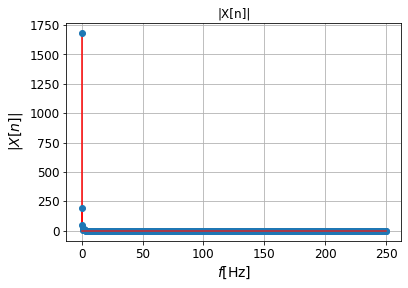

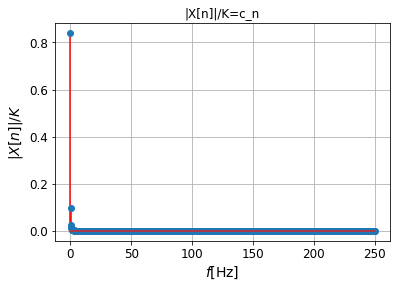

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 4 
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,Nm)
xo = np.exp((1j)*tv/2)
vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.grid()
plt.show()

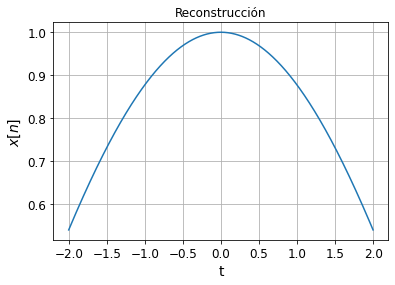

In [ ]:
#la reconstrucción de x[k] 
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title('Reconstrucción')
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x[n]$',fontsize = 14)
plt.grid()
plt.show()

**f) $t^{2}$**

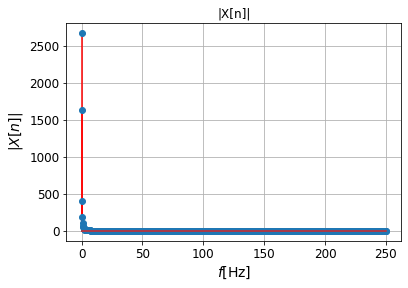

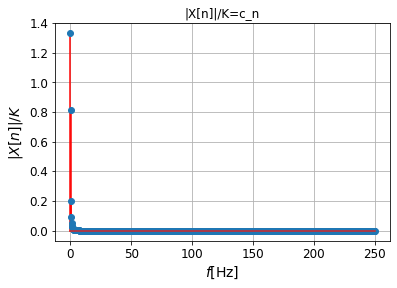

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

T = 4 
Fs = 500 
Nm = T*Fs 
tv = np.linspace(-T/2,T/2,Nm)
xo = tv**2
vf = np.fft.rfftfreq(len(xo),1/Fs) #calculo vector de frecuencias
Xw = np.fft.rfft(xo) #cálculo FFT
plt.stem(vf,abs(Xw),'r')
plt.title(r'|X[n]|')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|$',fontsize = 14)
plt.axis('tight')
plt.grid()
plt.show()
plt.stem(vf,abs(Xw)/(2*len(vf)),'r')
plt.title(r'|X[n]|/K=c_n')
plt.xlabel(r'$f$[Hz]',fontsize = 14)
plt.ylabel(r'$|X[n]|/K$',fontsize = 14)
plt.grid()
plt.show()

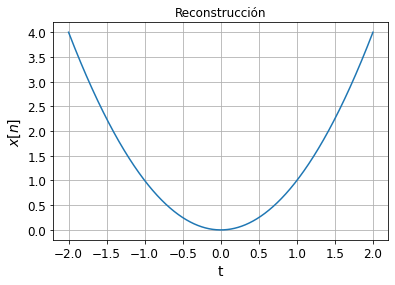

In [ ]:
#la reconstrucción de x[k] 
xe = np.fft.irfft(Xw)
plt.plot(tv,xe)
plt.title('Reconstrucción')
plt.xlabel('t',fontsize = 14)
plt.ylabel('$x[n]$',fontsize = 14)
plt.grid()
plt.show()